In [1]:
pip install scikit-learn matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Eduardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance



In [3]:


#The dataset can be downloaded from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, delim_whitespace=True, names=columns)

# Display the first few rows of data
data.head()


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_7040\1494676611.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=columns)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
# Separate features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Separate the data by gender
X_male = X[X['sex'] == 1].drop('sex', axis=1)
y_male = y[X['sex'] == 1]

X_female = X[X['sex'] == 0].drop('sex', axis=1)
y_female = y[X['sex'] == 0]

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)


In [ ]:

# Training the classification models
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Training on complete data
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Evaluate the accuracy of the models
knn_acc = accuracy_score(y_test, knn.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))

print(f'Accuracy KNN: {knn_acc:.2f}, Random Forest: {rf_acc:.2f}, Decision Tree: {dt_acc:.2f}')


Acurácia KNN: 0.65, Random Forest: 0.80, Decision Tree: 0.69


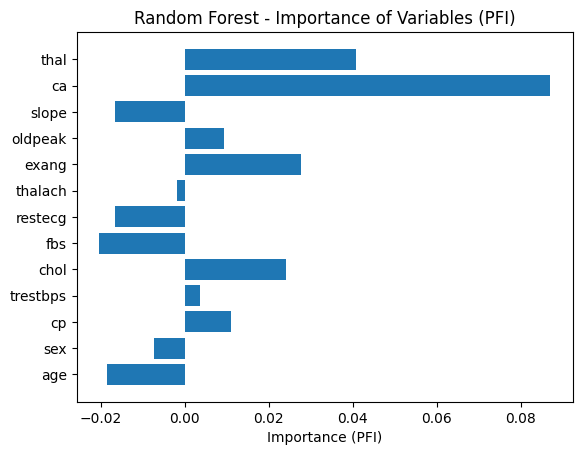

In [6]:

# Calculate Permutation Feature Importance (PFI)
pfi_knn = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
pfi_rf = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
pfi_dt = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42)

# Plot the importance of variables for the Random Forest model as an example.
plt.barh(X.columns, pfi_rf.importances_mean)
plt.xlabel("Importance (PFI)")
plt.title("Random Forest - Importance of Variables (PFI)")
plt.show()


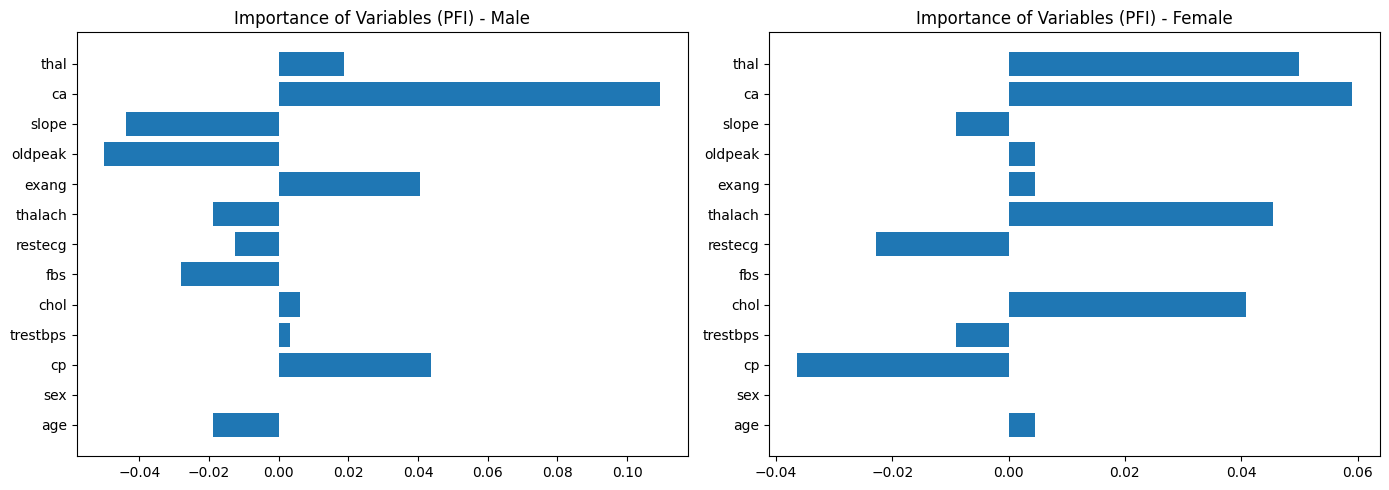

In [7]:
# Divide the data by gender
X_male = X_test[X_test['sex'] == 1]
y_male = y_test[X_test['sex'] == 1]

X_female = X_test[X_test['sex'] == 0]
y_female = y_test[X_test['sex'] == 0]

# Calculate PFI for subsets by gender.
pfi_rf_male = permutation_importance(rf, X_male, y_male, n_repeats=10, random_state=42)
pfi_rf_female = permutation_importance(rf, X_female, y_female, n_repeats=10, random_state=42)

# Plot the importance of variables by gender (Random Forest)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.barh(X_male.columns, pfi_rf_male.importances_mean)
ax1.set_title('Importance of Variables (PFI) - Male')
ax2.barh(X_female.columns, pfi_rf_female.importances_mean)
ax2.set_title('Importance of Variables (PFI) - Female')
plt.tight_layout()
plt.show()
